# Addition and two oktaeder simulation

In [1]:
import numpy as np
from qiskit import *

In [2]:
def classically_enter_number(circ, num):
    i = 0
    while num != 0:
        if num % 2 == 1:
            circ.x(i)
        num//=2
        i += 1

In [3]:
circ = QuantumCircuit(9,4)

# all possible additions:
#circ.h(range(6))

# superposition of 0+0 and 7+7
"""circ.h(0)
circ.cnot(0,range(1,6))"""

# entering numbers:
# this is a superposition of 1 and 5 in the second number
classically_enter_number(circ, 3 + 8*1)
circ.h(5)


circ.barrier()

circ.ccx(0,3,6) # carry bit
circ.cnot(3,0)

circ.ccx(1,6,7)
circ.cnot(6,1)
circ.ccx(1,4,7)
circ.cnot(4,1)

circ.swap(3,8)

circ.ccx(2,7,3)
circ.cnot(7,2)
circ.ccx(2,5,3)
circ.cnot(5,2)

# now in 0 to 3 we should have the 4 bit sum of 0 to 2 and 3 to 5.

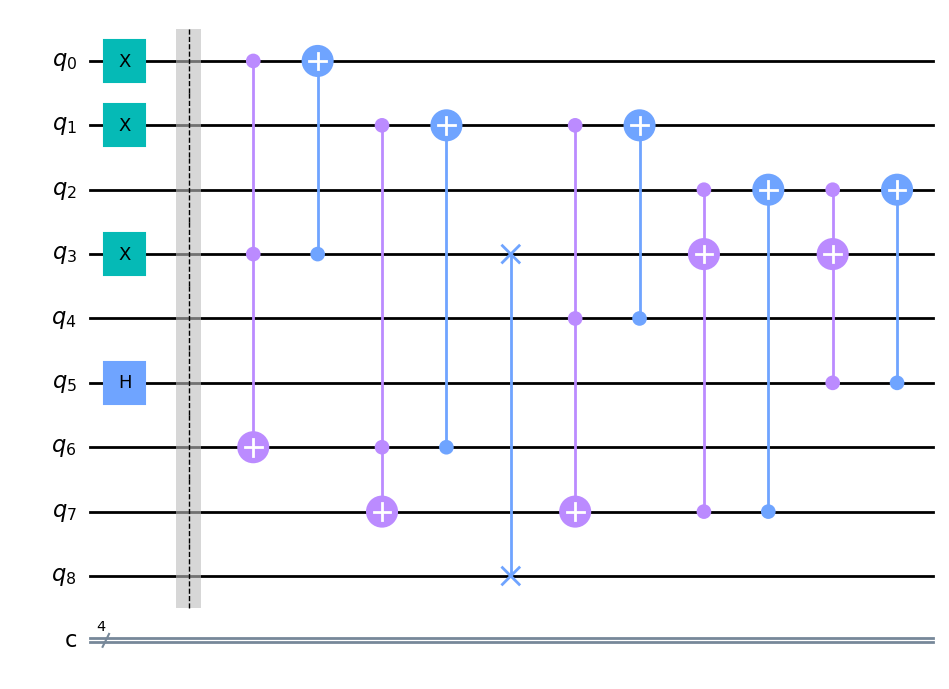

In [4]:
circ.draw()

In [5]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [6]:
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=10)
probs=np.abs(outputstate)**2
print(probs)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [7]:
print(np.vstack(np.where(probs.reshape([2,2,2,8,8]))).T)
print(np.vstack(np.where(probs.reshape([2,2,2,4,16]))).T)
print(np.vstack(np.where(probs.reshape([2]*9))).T)

[[1 1 1 0 4]
 [1 1 1 5 0]]
[[1 1 1 0 4]
 [1 1 1 2 8]]
[[1 1 1 0 0 0 1 0 0]
 [1 1 1 1 0 1 0 0 0]]


In [104]:
np.where(probs)[0]%2**7

array([ 0,  1,  2,  3,  4,  5,  6,  7, 18, 19, 22, 23, 36, 37, 38, 39, 40,
       41, 42, 43, 54, 55, 58, 59, 20, 21, 24, 25, 56, 57, 60, 61])

In [105]:
2**7

128

In [218]:
out = (probs).reshape((-1,2**4))
out

array([[0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.015625, 0.015625, 0.      , 0.      ,
        0.015625, 0.015625, 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.015625, 0.015625, 0.      , 0.      , 0.015625, 0.015625,
        0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       

In [219]:
out.sum(0)

array([0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125, 0.09375 ,
       0.109375, 0.125   , 0.109375, 0.09375 , 0.078125, 0.0625  ,
       0.046875, 0.03125 , 0.015625, 0.      ])

In [91]:
1/2**6 

0.015625